#### Your goal is to create and tune the hyperparameters through a GridSearchCV of an SVC who is classifying images.

##### Steps: 
- Create an SVC model to classify drawn digits into their corresponding value.  Split your data into a 50% train and 50% test subset.  Ensure that the shuffle parameter is offand you are not randomizing this dataset.
- Create your grid search strategy intending to find the best model based on "F1-score".  Make sure your parameters include a wide range of values
- Create a dataframe and visualizations showing statistics of each model tried in the search.


- How did the best models compare to the worst models?
- Why did we not shuffle our dataset?
- What parameters did you try adjusting in the SVC?


- If you complete this, attempt to repeat this process but this time using a RandomizedSearchCV, and contrast the results with your original search - specifically the time it takes to run.

In [101]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, f1_score

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


digits = datasets.load_digits()
#Display an image for debugging
def display_image(n):
    # Display the image with the target (digit) displayed above
    image = digits.images[n]
    target = digits.target[n]
    plt.figure(figsize = (1,1))
    plt.imshow(image, cmap='gray')
    plt.title(f'Target: {target}')
    plt.axis('off')
    plt.show()

#Your code here - write an SVC to classify the digits dataset!

In [102]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
# display(df)
X = digits.data
y = digits.target

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=5, shuffle=False)

In [104]:


params_tuning = GridSearchCV(SVC(random_state=15), {
        'C': [1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['auto', 'scale'],
        'class_weight': [None, 'balanced'],
        'decision_function_shape': ['ovo', 'ovr']
    }, scoring= 'f1_macro', cv=5, return_train_score=False)

params_tuning.fit(X_train,y_train)
result = params_tuning.cv_results_

df = pd.DataFrame(result)

print(params_tuning.best_params_)

{'C': 10, 'class_weight': None, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


In [105]:
display(df)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008755,0.000282,0.004078,0.000350,1,None,ovo,auto,linear,"{'C': 1, 'class_weight': None, 'decision_funct...",0.932844,0.971681,0.864048,0.954321,0.925081,0.929595,0.036633,49
1,0.010005,0.000203,0.004201,0.000326,1,None,ovo,auto,poly,"{'C': 1, 'class_weight': None, 'decision_funct...",0.938439,0.983002,0.885937,0.983152,0.947314,0.947569,0.035787,13
2,0.051756,0.002022,0.023456,0.001083,1,None,ovo,auto,rbf,"{'C': 1, 'class_weight': None, 'decision_funct...",0.378178,0.423908,0.352630,0.556552,0.418890,0.426032,0.070383,95
3,0.008349,0.000547,0.003941,0.000306,1,None,ovo,scale,linear,"{'C': 1, 'class_weight': None, 'decision_funct...",0.932844,0.971681,0.864048,0.954321,0.925081,0.929595,0.036633,49
4,0.009983,0.000243,0.003913,0.000281,1,None,ovo,scale,poly,"{'C': 1, 'class_weight': None, 'decision_funct...",0.938439,0.983002,0.883847,0.983152,0.947066,0.947101,0.036509,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.010115,0.000496,0.003879,0.000304,1000,balanced,ovr,auto,poly,"{'C': 1000, 'class_weight': 'balanced', 'decis...",0.938439,0.983002,0.885937,0.983152,0.947314,0.947569,0.035787,13
92,0.053409,0.001376,0.024919,0.000386,1000,balanced,ovr,auto,rbf,"{'C': 1000, 'class_weight': 'balanced', 'decis...",0.401447,0.473134,0.373886,0.572203,0.441987,0.452531,0.068777,81
93,0.008936,0.000835,0.003719,0.000302,1000,balanced,ovr,scale,linear,"{'C': 1000, 'class_weight': 'balanced', 'decis...",0.932844,0.971681,0.864048,0.954321,0.925081,0.929595,0.036633,49
94,0.010244,0.000390,0.004348,0.000712,1000,balanced,ovr,scale,poly,"{'C': 1000, 'class_weight': 'balanced', 'decis...",0.938439,0.983002,0.885937,0.983152,0.947314,0.947569,0.035787,13


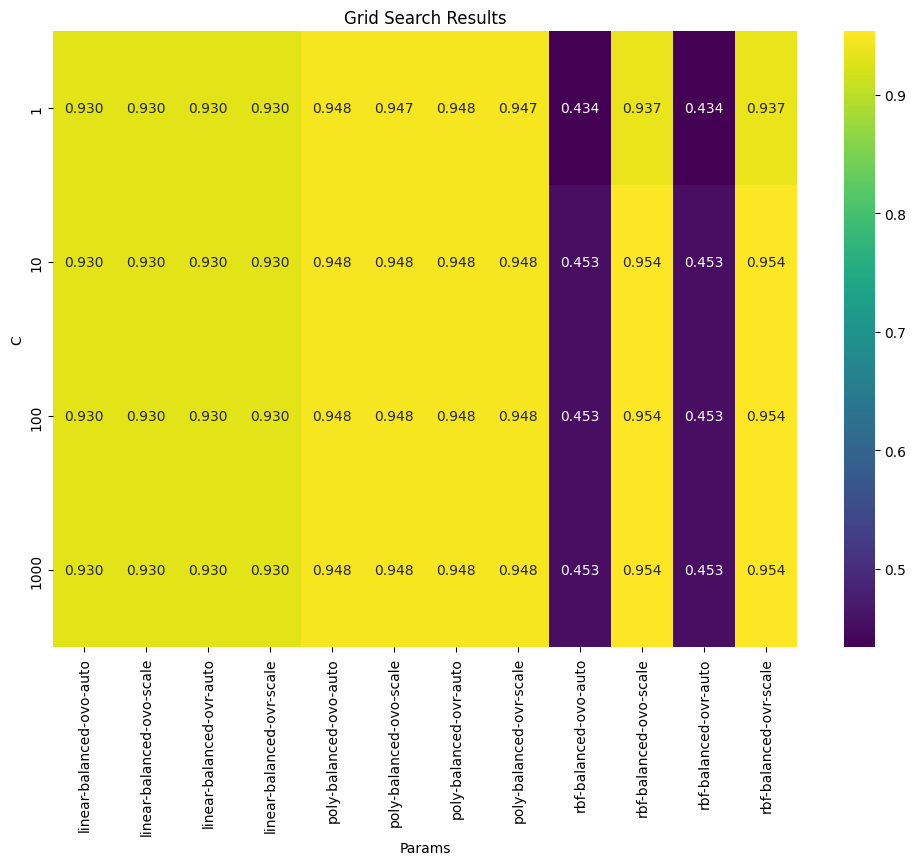

In [106]:
heatmap_data = df.pivot_table(index='param_C', 
                              columns=['param_kernel', 'param_class_weight', 'param_decision_function_shape', 'param_gamma'], 
                              values='mean_test_score')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', cbar=True)
plt.title('Grid Search Results')
plt.xlabel('Params')
plt.ylabel('C')
plt.show()

In [107]:
# C_values = df['param_C'].unique()
# kernel_values = df['param_kernel'].unique()
# gamma_values = df['param_gamma'].unique()

# # Create a grouped bar chart
# bar_width = 0.2
# index = np.arange(len(C_values))

# fig, ax = plt.subplots(figsize=(12, 8))

# for i, gamma_value in enumerate(gamma_values):
#     subset_df = df[df['param_gamma'] == gamma_value]
#     mean_scores = subset_df.groupby(['param_C', 'param_kernel'])['mean_test_score'].mean().values
#     ax.bar(index + i * bar_width, mean_scores, bar_width, label=f'Gamma: {gamma_value}')

# ax.set_xlabel('C and Kernel')
# ax.set_ylabel('Mean Test Score')
# ax.set_title('Grid Search Results')
# ax.set_xticks(index + (len(gamma_values) - 1) * bar_width / 2)
# ax.set_xticklabels([f'C: {C}, Kernel: {kernel}' for C in C_values for kernel in kernel_values])
# ax.legend(title='Gamma')

# plt.show()

In [108]:
# svc_pred = params_tuning.predict(X_test)

# r2 = r2_score(y_test, svc_pred)

# print(r2_score)

In [109]:
defualt_model = SVC()
defualt_model.fit(X_train, y_train)
defualt_model_pred = defualt_model.predict(X_test)

default_model_f1_score = f1_score(y_test, defualt_model_pred, average='weighted')

print(default_model_f1_score)

0.9609934609331652


In [110]:
final_model = SVC(C= 10, class_weight= None, decision_function_shape= 'ovo', gamma= 'scale', kernel= 'rbf')
final_model.fit(X_train, y_train)
final_model_pred = final_model.predict(X_test)

final_model_f1_score = f1_score(y_test, final_model_pred, average='weighted')

print(final_model_f1_score)

0.9677758222180098
